In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Table of Contents
* [Without Noise](#without-noise)
    * [12 Samples, sqrts](#12-samples-sqrts)
    * [12 Samples, sqrts + cubes](#12-samples-sqrts-cubes)
    * [25 Samples, sqrts](#25-samples-sqrts)
    * [25 Samples, sqrts + cubes](#25-samples-sqrts-cubes)
    * [50 Samples, sqrts](#50-samples-sqrts)
    * [50 Samples, sqrts + cubes](#50-samples-sqrts-cubes)
* [Laplacian Noise, 12 samples](#laplacian-noise-12-samples)
    * [25%](#laplacian-noise-12-samples-25)
    * [40%](#laplacian-noise-12-samples-40)
    * [45%](#laplacian-noise-12-samples-45)
* [Laplacian Noise, 25 samples](#laplacian-noise-25-samples)
    * [25%](#laplacian-noise-25-samples-25)
    * [40%](#laplacian-noise-25-samples-40)
    * [45%](#laplacian-noise-25-samples-45)
* [Laplacian Noise, 50 samples](#laplacian-noise-50-samples)
    * [25%](#laplacian-noise-50-samples-25)
    * [40%](#laplacian-noise-50-samples-40)
    * [45%](#laplacian-noise-50-samples-45)
* [Gaussian Noise, 12 samples](#gaussian-noise-12-samples)
    * [25%](#gaussian-noise-12-samples-25)
    * [40%](#gaussian-noise-12-samples-40)
    * [45%](#gaussian-noise-12-samples-45)
* [Gaussian Noise, 25 samples](#gaussian-noise-25-samples)
    * [25%](#gaussian-noise-25-samples-25)
    * [40%](#gaussian-noise-25-samples-40)
    * [45%](#gaussian-noise-25-samples-45)
* [Gaussian Noise, 50 samples](#gaussian-noise-50-samples)
    * [25%](#gaussian-noise-50-samples-25)
    * [40%](#gaussian-noise-50-samples-40)
    * [45%](#gaussian-noise-50-samples-45)


## Results for 12 samples, sqrts <a id="12-samples-sqrts"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3        True  91.066099
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  96.374597
4             0           0      2     6        True  95.805501
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


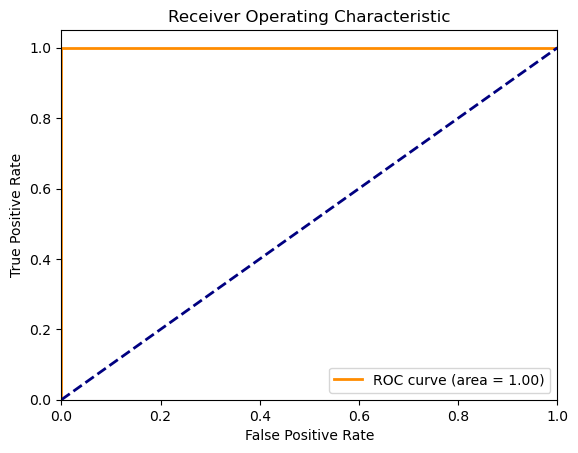

ROC AUC score: 1.00


In [44]:
# Read the CSV file into a DataFrame
df_12 = pd.read_csv('12samps.csv')

# Display the first few rows and data types
print(df_12.head())
print(df_12.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_12.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_12['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 12 samples, sqrts + cubes <a id="12-samples-sqrts-cubes"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3        True  91.066099
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  96.374597
4             0           0      2     6        True  95.805501
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


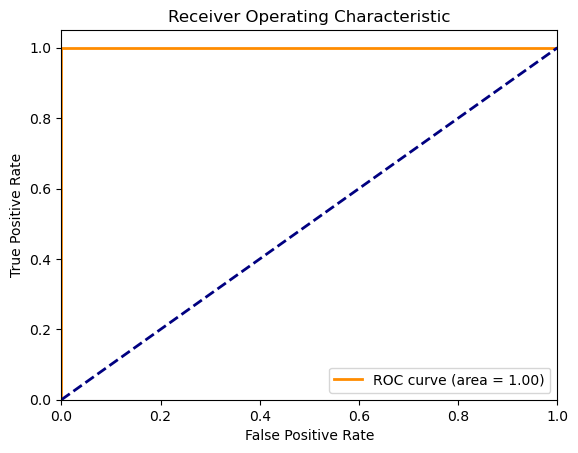

ROC AUC score: 1.00


In [31]:
# Read the CSV file into a DataFrame
df_12c = pd.read_csv('12sampscube.csv')

# Display the first few rows and data types
print(df_12c.head())
print(df_12c.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_12c.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_12c['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 25 samples, sqrts <a id="25-samples-sqrts"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3        True  91.066099
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  96.374597
4             0           0      2     6        True  95.805501
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


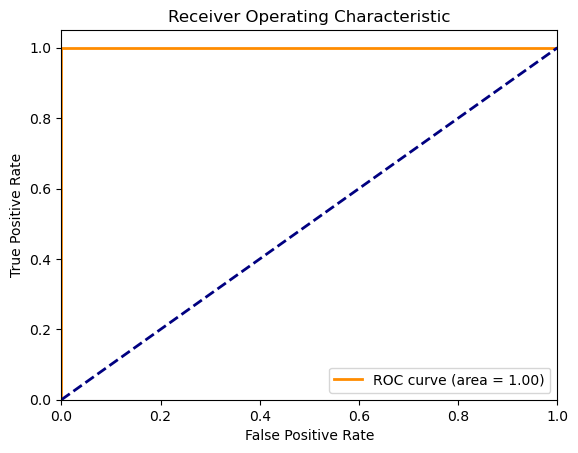

ROC AUC score: 1.00


In [33]:
# Read the CSV file into a DataFrame
df_25 = pd.read_csv('25samps.csv')

# Display the first few rows and data types
print(df_25.head())
print(df_25.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_25.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_25['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 25 samples, sqrts + cubes <a id="25-samples-sqrts-cubes"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3        True  91.066099
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  96.374597
4             0           0      2     6        True  95.805501
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


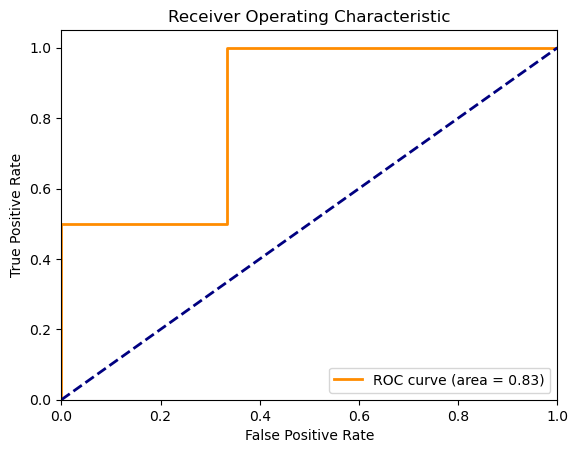

ROC AUC score: 0.83


In [63]:
# Read the CSV file into a DataFrame
df_25c = pd.read_csv('tables_25.csv')

# Display the first few rows and data types
print(df_25c.head())
print(df_25c.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_25c.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_25c['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 50 samples, sqrts <a id="50-samples-sqrts"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3        True  91.066099
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  96.374597
4             0           0      2     6        True  95.805501
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


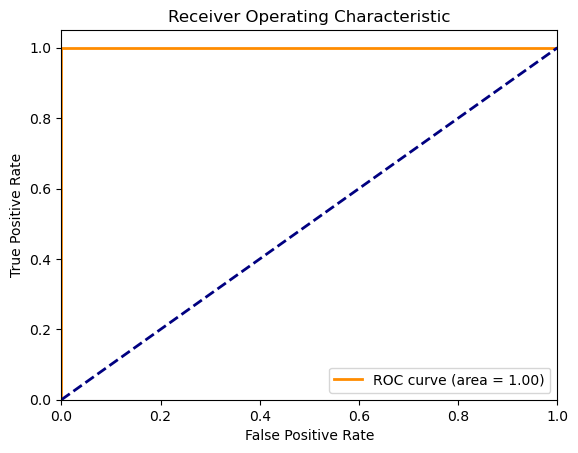

ROC AUC score: 1.00


In [34]:
# Read the CSV file into a DataFrame
df_50 = pd.read_csv('50samps.csv')

# Display the first few rows and data types
print(df_50.head())
print(df_50.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_50.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_50['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 50 samples, sqrts + cubes <a id="50-samples-sqrts-cubes"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3        True  91.066099
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  96.374597
4             0           0      2     6        True  95.805501
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


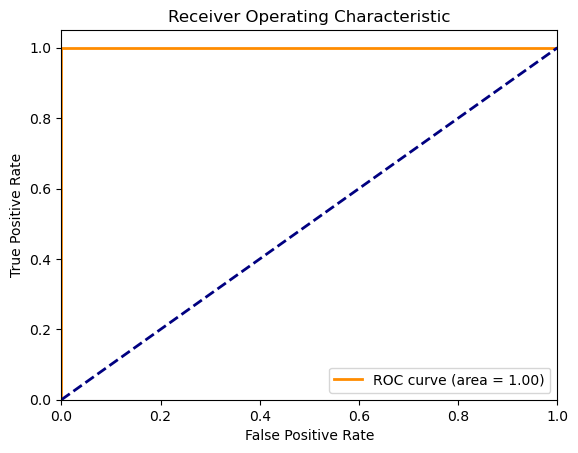

ROC AUC score: 1.00


In [64]:
# Read the CSV file into a DataFrame
df_50c = pd.read_csv('tables_50.csv')

# Display the first few rows and data types
print(df_50c.head())
print(df_50c.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_50c.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_50c['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 12 samples laplace noise =.45  <a id="laplacian-noise-12-samples-45"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run  QPDS
0             0           0      2     2       False   0.0
1             0           0      2     3       False   0.0
2             0           0      2     4       False   0.0
3             0           0      2     5       False   0.0
4             0           0      2     6       False   0.0
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


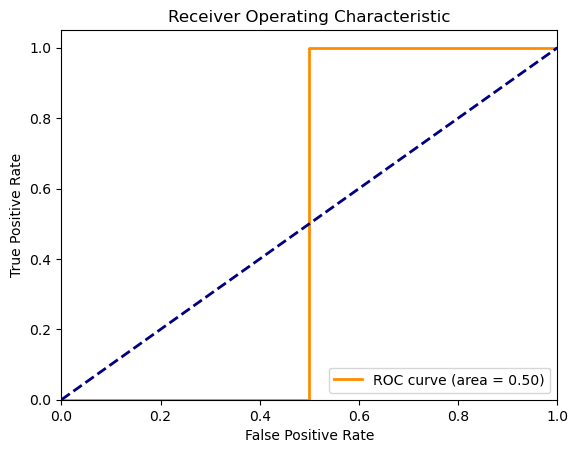

ROC AUC score: 0.50


In [39]:
# Read the CSV file into a DataFrame
df_12_L45 = pd.read_csv('table_12_L45.csv')

# Display the first few rows and data types
print(df_12_L45.head())
print(df_12_L45.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_12_L45.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_12_L45['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 12 samples laplace noise =.40  <a id="laplacian-noise-12-samples-40"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run  QPDS
0             0           0      2     2       False   0.0
1             0           0      2     3       False   0.0
2             0           0      2     4       False   0.0
3             0           0      2     5       False   0.0
4             0           0      2     6       False   0.0
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


C:\Users\Kimberly\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


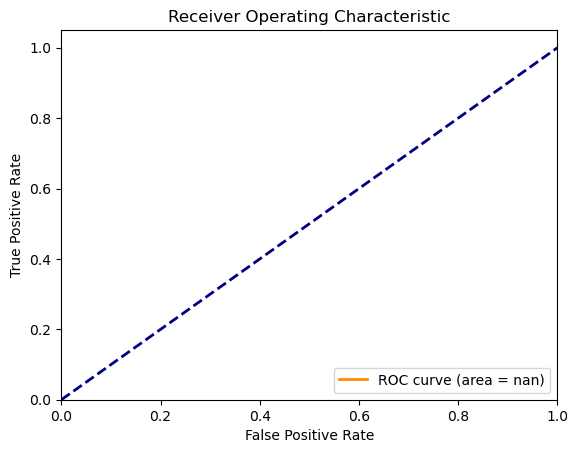

ROC AUC score: nan


In [70]:
# Read the CSV file into a DataFrame
df_12_L40 = pd.read_csv('tables_12_L40.csv')

# Display the first few rows and data types
print(df_12_L40.head())
print(df_12_L40.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_12_L40.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_12_L40['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 12 samples laplace noise =.25  <a id="laplacian-noise-12-samples-25"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3       False   0.000000
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  97.995284
4             0           0      2     6        True  97.165583
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object
QPDS
0    14
1     6
Name: count, dtype: int64


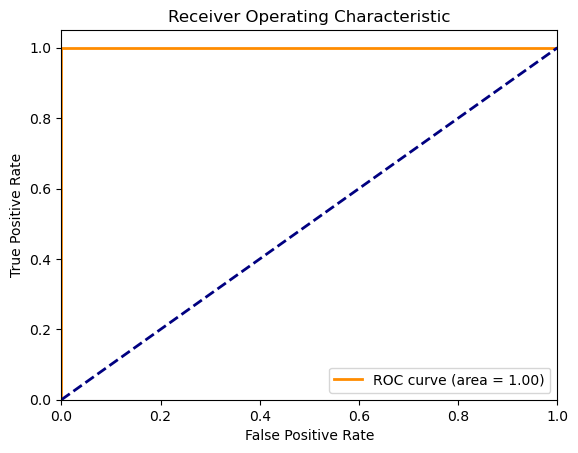

ROC AUC score: 1.00


In [58]:
# Read the CSV file into a DataFrame
df_12_L25 = pd.read_csv('tables_12_L25.csv')

# Display the first few rows and data types
print(df_12_L25.head())
print(df_12_L25.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_12_L25.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_12_L25['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 12 samples Gaussian noise =.25  <a id="gaussian-noise-12-samples-25"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3        True  91.426504
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  94.650980
4             0           0      2     6        True  95.850602
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


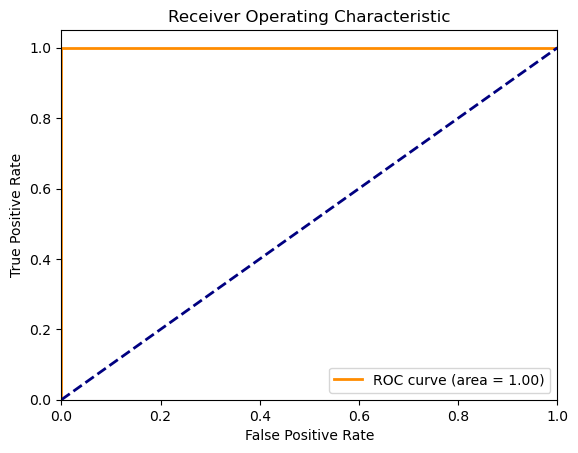

ROC AUC score: 1.00


In [59]:
# Read the CSV file into a DataFrame
df_12_G25 = pd.read_csv('tables_12_G25.csv')

# Display the first few rows and data types
print(df_12_G25.head())
print(df_12_G25.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_12_G25.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_12_G25['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 12 samples Gaussian noise =.4  <a id="gaussian-noise-12-samples-40"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3        True  95.094119
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  95.647015
4             0           0      2     6        True  93.656472
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


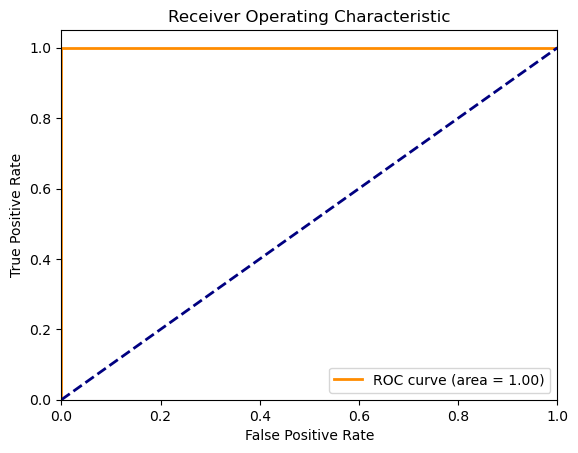

ROC AUC score: 1.00


In [61]:
# Read the CSV file into a DataFrame
df_12_G40 = pd.read_csv('tables_12_G40.csv')

# Display the first few rows and data types
print(df_12_G40.head())
print(df_12_G40.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_12_G40.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_12_G40['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 12 samples Gaussian noise =.45 <a id="gaussian-noise-12-samples-45"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3       False   0.000000
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  95.710071
4             0           0      2     6        True  99.181249
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


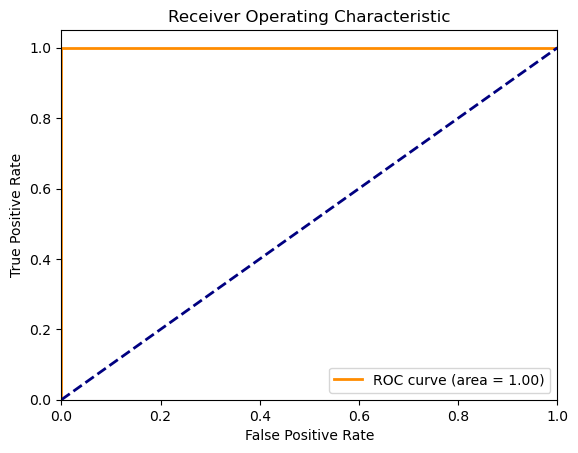

ROC AUC score: 1.00


In [62]:
# Read the CSV file into a DataFrame
df_12_G45 = pd.read_csv('tables_12_G45.csv')

# Display the first few rows and data types
print(df_12_G45.head())
print(df_12_G45.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_12_G45.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_12_G45['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 25 samples laplace noise =.25  <a id="laplacian-noise-25-samples-25"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3       False   0.000000
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  97.995284
4             0           0      2     6        True  97.165583
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


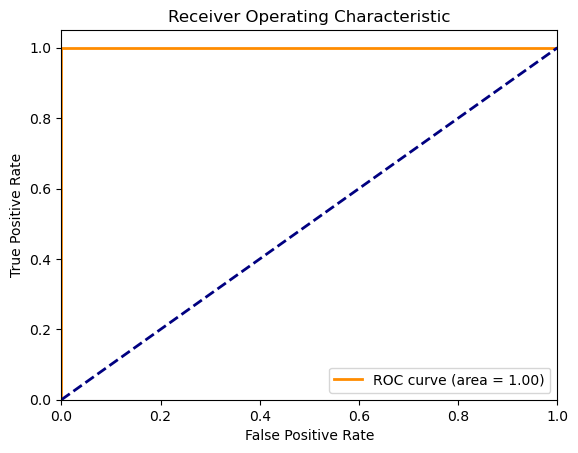

ROC AUC score: 1.00


In [65]:
# Read the CSV file into a DataFrame
df_25_L25 = pd.read_csv('tables_25_L25.csv')

# Display the first few rows and data types
print(df_25_L25.head())
print(df_25_L25.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_25_L25.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_25_L25['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 25 samples laplace noise =.40  <a id="laplacian-noise-25-samples-40"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run  QPDS
0             0           0      2     2       False   0.0
1             0           0      2     3       False   0.0
2             0           0      2     4       False   0.0
3             0           0      2     5       False   0.0
4             0           0      2     6       False   0.0
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


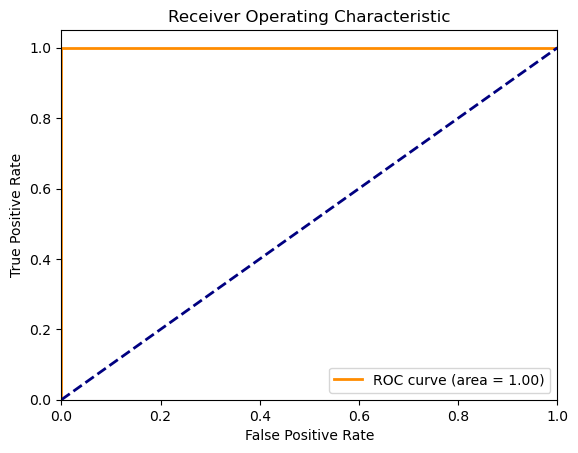

ROC AUC score: 1.00


In [67]:
# Read the CSV file into a DataFrame
df_25_L40 = pd.read_csv('tables_25_L40.csv')

# Display the first few rows and data types
print(df_25_L40.head())
print(df_25_L40.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_25_L40.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_25_L40['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 25 samples laplace noise =.45  <a id="laplacian-noise-25-samples-45"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run  QPDS
0             0           0      2     2       False   0.0
1             0           0      2     3       False   0.0
2             0           0      2     4       False   0.0
3             0           0      2     5       False   0.0
4             0           0      2     6       False   0.0
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


C:\Users\Kimberly\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


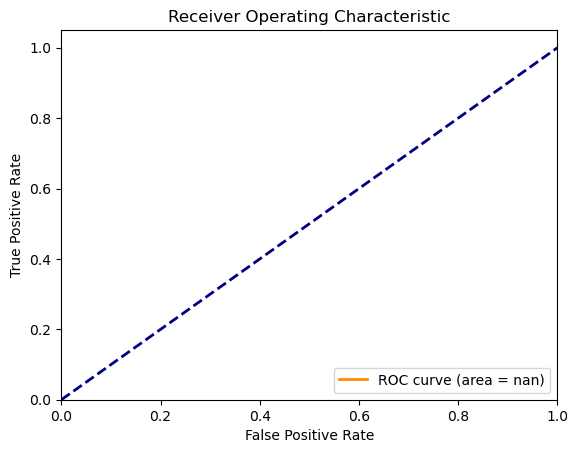

ROC AUC score: nan


In [68]:
# Read the CSV file into a DataFrame
df_25_L45 = pd.read_csv('tables_25_L45.csv')

# Display the first few rows and data types
print(df_25_L45.head())
print(df_25_L45.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_25_L45.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_25_L45['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 50 samples laplace noise =.25 <a id="laplacian-noise-50-samples-25"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3       False   0.000000
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  97.995284
4             0           0      2     6        True  97.165583
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


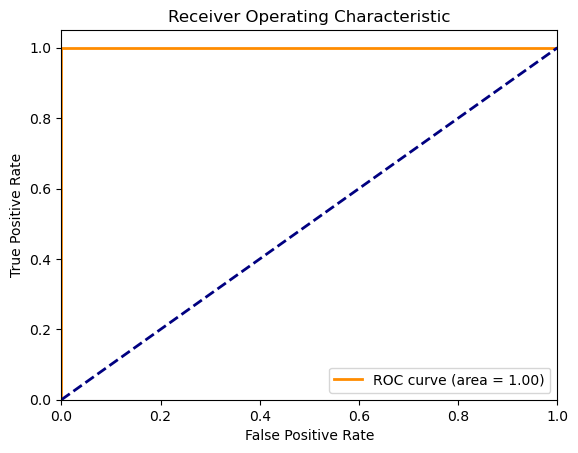

ROC AUC score: 1.00


In [72]:
# Read the CSV file into a DataFrame
df_50_L25 = pd.read_csv('tables_50_L25.csv')

# Display the first few rows and data types
print(df_50_L25.head())
print(df_50_L25.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_50_L25.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_50_L25['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 50 samples laplace noise =.40 <a id="laplacian-noise-50-samples-40"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run  QPDS
0             0           0      2     2       False   0.0
1             0           0      2     3       False   0.0
2             0           0      2     4       False   0.0
3             0           0      2     5       False   0.0
4             0           0      2     6       False   0.0
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


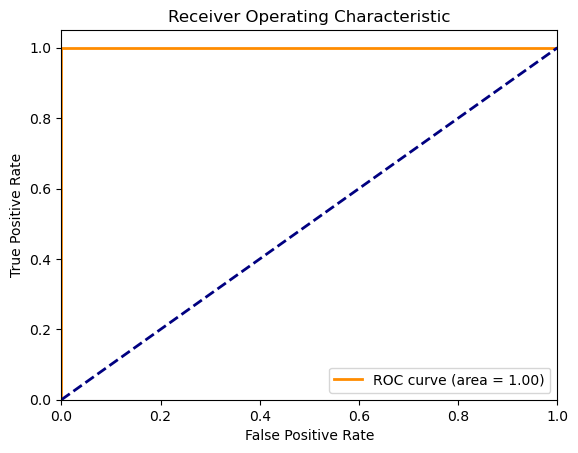

ROC AUC score: 1.00


In [73]:
# Read the CSV file into a DataFrame
df_50_L40 = pd.read_csv('tables_50_L40.csv')

# Display the first few rows and data types
print(df_50_L40.head())
print(df_50_L40.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_50_L40.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_50_L40['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 50 samples laplace noise =.45 <a id="laplacian-noise-50-samples-45"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run  QPDS
0             0           0      2     2       False   0.0
1             0           0      2     3       False   0.0
2             0           0      2     4       False   0.0
3             0           0      2     5       False   0.0
4             0           0      2     6       False   0.0
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


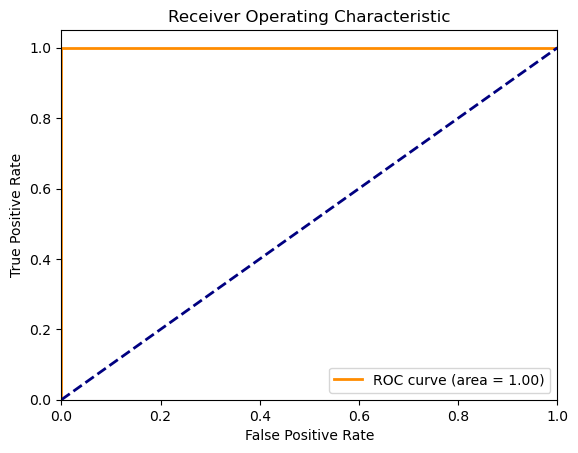

ROC AUC score: 1.00


In [74]:
# Read the CSV file into a DataFrame
df_50_L45 = pd.read_csv('tables_50_L45.csv')

# Display the first few rows and data types
print(df_50_L45.head())
print(df_50_L45.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_50_L45.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_50_L45['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 25 samples Gaussian noise =.25 <a id="gaussian-noise-25-samples-25"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3        True  91.426504
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  94.650980
4             0           0      2     6        True  95.850602
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


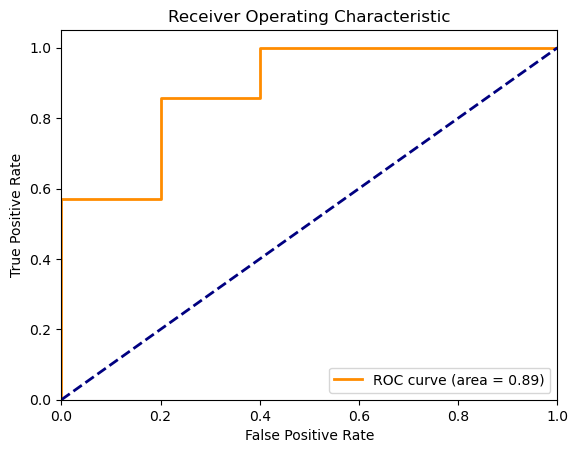

ROC AUC score: 0.89


In [76]:
# Read the CSV file into a DataFrame
df_25_G25 = pd.read_csv('tables_25_G25.csv')

# Display the first few rows and data types
print(df_25_G25.head())
print(df_25_G25.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_25_G25.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_25_G25['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 25 samples Gaussian noise =.40 <a id="gaussian-noise-25-samples-40"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3        True  95.094119
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  95.647015
4             0           0      2     6        True  93.656472
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


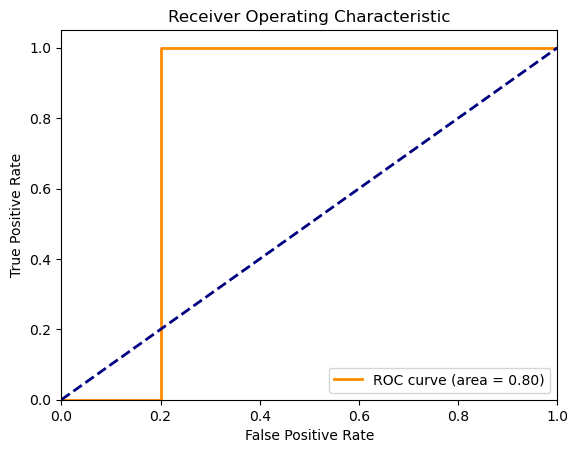

ROC AUC score: 0.80


In [78]:
# Read the CSV file into a DataFrame
df_25_G40 = pd.read_csv('tables_25_G40.csv')

# Display the first few rows and data types
print(df_25_G40.head())
print(df_25_G40.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_25_G40.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_25_G40['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 25 samples Gaussian noise =.45 <a id="gaussian-noise-25-samples-45"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3       False   0.000000
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  95.710071
4             0           0      2     6        True  99.181249
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


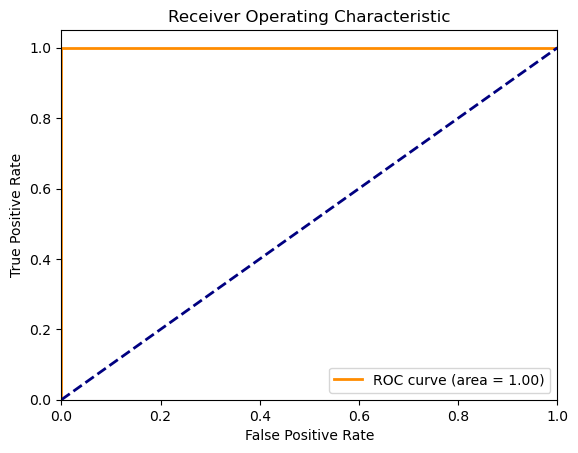

ROC AUC score: 1.00


In [79]:
# Read the CSV file into a DataFrame
df_25_G45 = pd.read_csv('tables_25_G45.csv')

# Display the first few rows and data types
print(df_25_G45.head())
print(df_25_G45.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_25_G45.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_25_G45['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 50 samples Gaussian noise =.25 <a id="gaussian-noise-50-samples-25"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3        True  91.426504
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  94.650980
4             0           0      2     6        True  95.850602
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


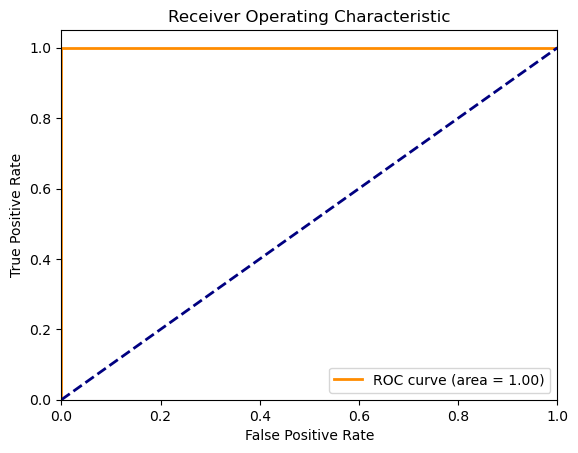

ROC AUC score: 1.00


In [80]:
# Read the CSV file into a DataFrame
df_50_G25 = pd.read_csv('tables_50_G25.csv')

# Display the first few rows and data types
print(df_50_G25.head())
print(df_50_G25.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_50_G25.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_50_G25['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 50 samples Gaussian noise =.40 <a id="gaussian-noise-50-samples-40"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3        True  95.094119
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  95.647015
4             0           0      2     6        True  93.656472
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


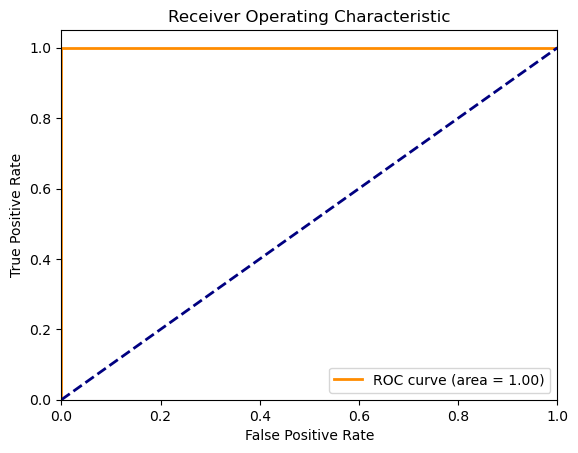

ROC AUC score: 1.00


In [81]:
# Read the CSV file into a DataFrame
df_50_G40 = pd.read_csv('tables_50_G40.csv')

# Display the first few rows and data types
print(df_50_G40.head())
print(df_50_G40.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_50_G40.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_50_G40['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')


### Results for 50 samples Gaussian noise =.45 <a id="gaussian-noise-50-samples-45"></a>

   Unnamed: 0.1  Unnamed: 0  power  base  Should Run       QPDS
0             0           0      2     2       False   0.000000
1             0           0      2     3       False   0.000000
2             0           0      2     4       False   0.000000
3             0           0      2     5        True  95.710071
4             0           0      2     6        True  99.181249
Unnamed: 0.1      int64
Unnamed: 0        int64
power             int64
base              int64
Should Run         bool
QPDS            float64
dtype: object


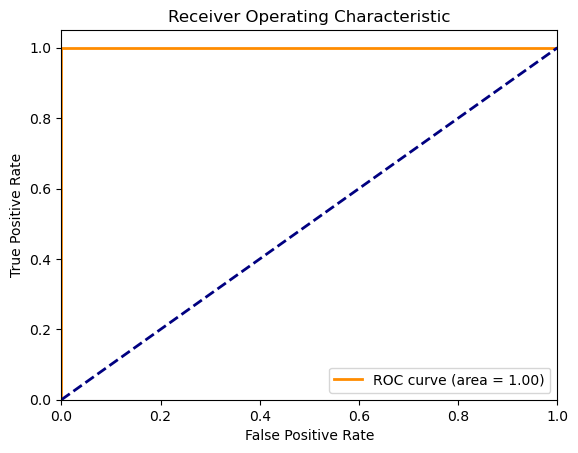

ROC AUC score: 1.00


In [82]:
# Read the CSV file into a DataFrame
df_50_G45 = pd.read_csv('tables_50_G45.csv')

# Display the first few rows and data types
print(df_50_G45.head())
print(df_50_G45.dtypes)

# Assuming 'QPDS' is the target column and you want to use the rest as features
data = df_50_G45.drop(columns=['QPDS'])  # Features (all columns except 'QPDS')
target = df_50_G45['QPDS']  # Target variable

# Convert the target variable to binary classes (e.g., using a median threshold)
threshold = target.median()
target_binary = (target > threshold).astype(int)

# Convert the features and target variable to arrays if needed
X = data.values
y = target_binary.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print(f'ROC AUC score: {roc_auc:.2f}')
